# Exploring the highd-data

In [135]:
import sys
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Force matplotlib to use inline backend
%matplotlib inline

# Add the parent directory to sys.path (useful to resolve module import errors)
sys.path.append(str(Path().resolve().parent.parent))


In [90]:
recording_id = 1

# Set path to HighD data
data_path = Path("../data/raw/highd/")

# Load the track file for the recording_id
tracks_path = data_path / f"{recording_id:02d}_tracks.csv"
tracks_df = pd.read_csv(tracks_path)

# Load the track metadata for the recording_id
tracks_meta_path = data_path / f"{recording_id:02d}_tracksMeta.csv"
tracks_meta = pd.read_csv(meta_path)

# Load the recording metadata
recording_meta_path = data_path / f"{recording_id:02d}_recordingMeta.csv"
recording_meta = pd.read_csv(recording_meta_path)

# Check data shape
print(f"\nLoaded recording {recording_id}")
print(f"\nTrajectory data shape: {tracks_df.shape}")
print(f"\nTracks Meta shape: {tracks_meta.shape}")
print(f"\nRecording Meta shape: {recording_meta.shape}")



Loaded recording 1

Trajectory data shape: (348750, 25)

Tracks Meta shape: (1047, 16)

Recording Meta shape: (1, 15)


In [78]:
print("Trajectory Data Columns\n")
print(tracks_df.columns.tolist())

Trajectory Data Columns

['frame', 'id', 'x', 'y', 'width', 'height', 'xVelocity', 'yVelocity', 'xAcceleration', 'yAcceleration', 'frontSightDistance', 'backSightDistance', 'dhw', 'thw', 'ttc', 'precedingXVelocity', 'precedingId', 'followingId', 'leftPrecedingId', 'leftAlongsideId', 'leftFollowingId', 'rightPrecedingId', 'rightAlongsideId', 'rightFollowingId', 'laneId']


### Preview Data

In [167]:
print("Trajectory/Tracks Data\n" + "-"*12)
display(tracks_df.head())

print("\nTracks meta\n" + "-"*6)
display(tracks_meta.head())

print("\nRecording meta\n" + "-"*9)
display(recording_meta.head())

Trajectory/Track Data
------------


,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId,speed
0,1,1,362.26,21.68,4.85,2.12,40.85,0.00,0.30,0.0,...,0,3,0,0,0,0,0,6,5,40.850000
1,2,1,363.73,21.68,4.85,2.12,40.87,0.00,0.30,0.0,...,0,14,0,0,0,0,0,6,5,40.870000
2,3,1,365.27,21.68,4.85,2.12,40.88,0.00,0.31,0.0,...,0,14,0,0,0,0,0,6,5,40.880000
3,4,1,366.83,21.68,4.85,2.12,40.89,0.00,0.32,0.0,...,0,14,0,0,0,0,0,6,5,40.890000
4,5,1,368.42,21.68,4.85,2.12,40.90,0.01,0.32,0.0,...,0,14,0,0,0,0,0,6,5,40.900001



Tracks meta
------


,id,width,height,initialFrame,finalFrame,numFrames,class,drivingDirection,traveledDistance,minXVelocity,maxXVelocity,meanXVelocity,minDHW,minTHW,minTTC,numLaneChanges
0,1,4.85,2.12,1,33,33,Car,2,52.25,40.85,41.30,41.07,-1.00,-1.00,-1.00,0
1,2,4.24,1.92,1,130,130,Car,1,167.44,32.04,32.90,32.48,112.62,3.51,-1.00,0
2,3,3.94,1.92,1,157,157,Car,2,225.23,35.69,36.50,36.13,90.31,2.53,-1.00,0
3,4,5.05,2.22,1,161,161,Car,1,273.49,42.57,42.83,42.76,-1.00,-1.00,-1.00,0
4,5,4.24,1.82,1,182,182,Car,1,313.92,42.50,44.26,43.40,33.64,0.76,24.53,0



Recording meta
---------


,id,frameRate,locationId,speedLimit,month,weekDay,startTime,duration,totalDrivenDistance,totalDrivenTime,numVehicles,numCars,numTrucks,upperLaneMarkings,lowerLaneMarkings
0,1,25,2,-1.0,9.2017,Tue,08:38,901.56,418549.19,13908.12,1047,863,184,8.51;12.59;16.43,21.00;24.96;28.80


### Summarize Data

In [125]:
FRAME_RATE = recording_meta.loc[0, "FRAME_RATE"]

print(f"\n📈 Basic data Insights:")
print(f"- Total vehicles in this recording: {tracks_df['id'].nunique()}")
print(f"- Total time frames: {tracks_df['frame'].max()}")
print(f"- Time duration: {tracks_df['frame'].max() / FRAME_RATE:.1f} seconds")
print(f"- Highway segment length: {tracks_df['x'].max() - tracks_df['x'].min():.1f} meters")

print("\n\nData Summary\n" + "-"*5)
tracks_df.describe(include='all')


📈 Basic data Insights:
- Total vehicles in this recording: 1047
- Total time frames: 22539
- Time duration: 901.6 seconds
- Highway segment length: 430.2 meters


Data Summary
-----


,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
count,348750.000000,348750.000000,348750.000000,348750.000000,348750.000000,348750.000000,348750.000000,348750.000000,348750.000000,348750.000000,...,348750.000000,348750.000000,348750.000000,348750.000000,348750.000000,348750.000000,348750.000000,348750.000000,348750.000000,348750.000000
mean,11092.433683,523.745746,204.281104,16.661879,6.717039,2.113467,-4.010287,-0.001647,0.054728,0.007636,...,-3.869772,391.717230,394.146724,181.105222,44.875352,196.544981,219.968118,44.810486,210.516416,3.795289
std,6375.582063,297.030503,117.204488,6.404551,4.272276,0.264999,30.378732,0.180925,0.296237,0.082029,...,26.096451,340.256519,341.188604,307.114828,168.675132,315.115893,316.918594,168.252081,314.937564,1.551607
min,1.000000,1.000000,-15.680000,8.200000,2.630000,1.720000,-48.870000,-1.790000,-2.950000,-0.750000,...,-48.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,5761.000000,269.000000,102.940000,9.870000,4.350000,1.920000,-30.920000,-0.060000,-0.050000,-0.030000,...,-29.030000,7.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,10529.000000,517.000000,204.115000,13.500000,4.750000,2.020000,-23.540000,0.000000,0.040000,0.010000,...,0.000000,343.000000,347.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,16451.000000,780.000000,305.470000,22.250000,6.060000,2.430000,29.080000,0.060000,0.160000,0.050000,...,23.410000,688.000000,692.000000,287.000000,0.000000,350.000000,411.000000,0.000000,385.000000,5.000000
max,22539.000000,1047.000000,414.520000,27.490000,19.400000,3.230000,50.260000,1.750000,2.230000,0.900000,...,50.260000,1045.000000,1047.000000,1045.000000,1045.000000,1047.000000,1046.000000,1046.000000,1046.000000,6.000000


### Creating Visualizations


laneId
2     94834
3    104649
5     75610
6     73657
Name: count, dtype: int64


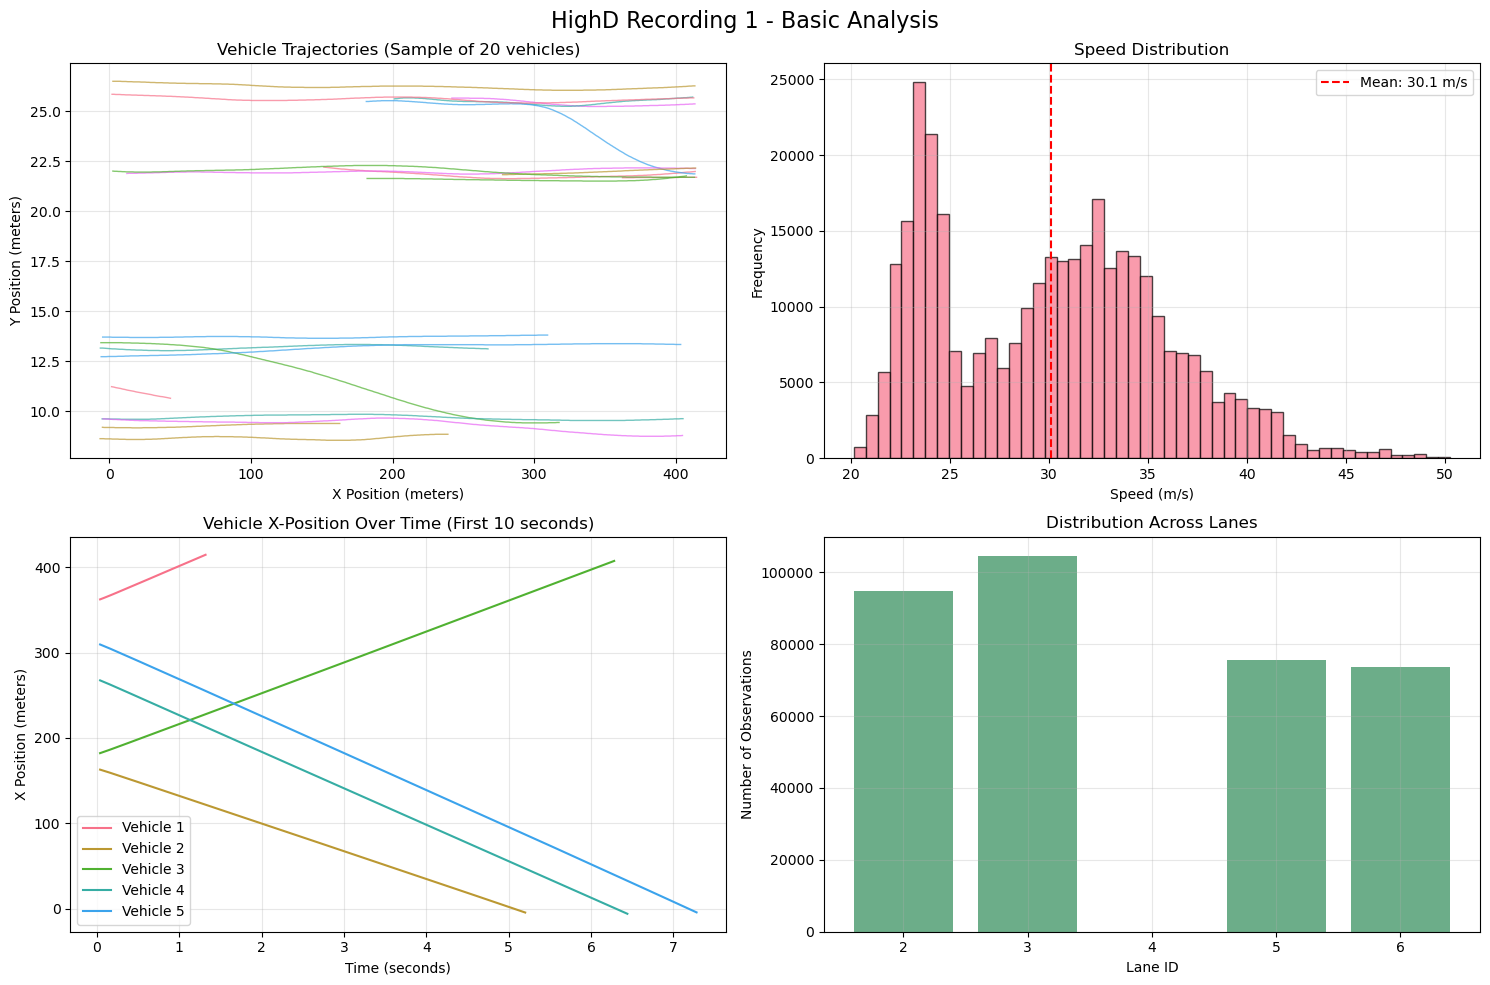

In [159]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'HighD Recording {recording_id} - Basic Analysis', fontsize=16)

# Plot 1: Highway overview - vehicle positions
ax1 = axes[0, 0]
# Sample some vehicles to avoid overcrowding
sample_vehicles = tracks_df['id'].unique()[:20]  
for vehicle_id in sample_vehicles:
    vehicle_data = tracks_df[tracks_df['id'] == vehicle_id]
    ax1.plot(vehicle_data['x'], vehicle_data['y'], alpha=0.7, linewidth=1)

ax1.set_xlabel('X Position (meters)')
ax1.set_ylabel('Y Position (meters)')
ax1.set_title('Vehicle Trajectories (Sample of 20 vehicles)')
ax1.grid(True, alpha=0.3)

# Plot 2: Speed distribution
ax2 = axes[0, 1]
# Calculate speed from velocity components
tracks_df['speed'] = np.sqrt(tracks_df['xVelocity']**2 + tracks_df['yVelocity']**2)
ax2.hist(tracks_df['speed'], bins=50, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Speed (m/s)')
ax2.set_ylabel('Frequency')
ax2.set_title('Speed Distribution')
ax2.grid(True, alpha=0.3)

# Add reference line (mean)
ax2.axvline(tracks_df['speed'].mean(), color='red', linestyle='--', label=f'Mean: {tracks_df["speed"].mean():.1f} m/s')
ax2.legend()

# Plot 3: Vehicle positions over time (first 10 seconds)
ax3 = axes[1, 0]
early_frames = tracks_df[tracks_df['frame'] <= 250]  # First 10 seconds
for vehicle_id in sample_vehicles[:5]:  # Just 5 vehicles for clarity
    vehicle_data = early_frames[early_frames['id'] == vehicle_id]
    if len(vehicle_data) > 0:
        ax3.plot(vehicle_data['frame']/FRAME_RATE, vehicle_data['x'], label=f'Vehicle {vehicle_id}')

ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('X Position (meters)')
ax3.set_title('Vehicle X-Position Over Time (First 10 seconds)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Lane distribution
ax4 = axes[1, 1]
lane_counts = tracks_df['laneId'].value_counts().sort_index()
print(lane_counts)
ax4.bar(lane_counts.index, lane_counts.values, color='seagreen', alpha=0.7)
ax4.set_xlabel('Lane ID')
ax4.set_ylabel('Number of Observations')
ax4.set_title('Distribution Across Lanes')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Analyzing Stopping Patterns

,speed
count,348750.000000
mean,30.111654
std,5.680515
min,20.130040
25%,24.450000
50%,30.340026
75%,34.100023
max,50.260143


,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId,speed
663,1,6,241.89,25.66,11.82,2.5,23.27,-0.0,-0.05,-0.00,...,0,10,1,0,3,0,0,0,6,23.27
664,2,6,242.73,25.66,11.82,2.5,23.27,-0.0,-0.05,-0.01,...,0,10,14,0,3,0,0,0,6,23.27
665,3,6,243.60,25.66,11.82,2.5,23.26,-0.0,-0.04,-0.01,...,0,10,14,0,3,0,0,0,6,23.26
666,4,6,244.50,25.66,11.82,2.5,23.26,-0.0,-0.04,-0.01,...,0,10,14,0,3,0,0,0,6,23.26
667,5,6,245.41,25.66,11.82,2.5,23.26,-0.0,-0.03,-0.02,...,0,10,14,0,3,0,0,0,6,23.26


Vehicles that had slow events: 269

Sample slow events:
     id  frame       x      y      speed  laneId
663   6      1  241.89  25.66  23.270000       6
664   6      2  242.73  25.66  23.270000       6
665   6      3  243.60  25.66  23.260000       6
666   6      4  244.50  25.66  23.260000       6
667   6      5  245.41  25.66  23.260000       6
668   6      6  246.33  25.66  23.260002       6
669   6      7  247.26  25.66  23.260002       6
670   6      8  248.19  25.66  23.260002       6
671   6      9  249.11  25.66  23.260002       6
672   6     10  250.04  25.66  23.260002       6
Creating Plot 4: Slow Event Locations...


C:\Users\Raphael\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


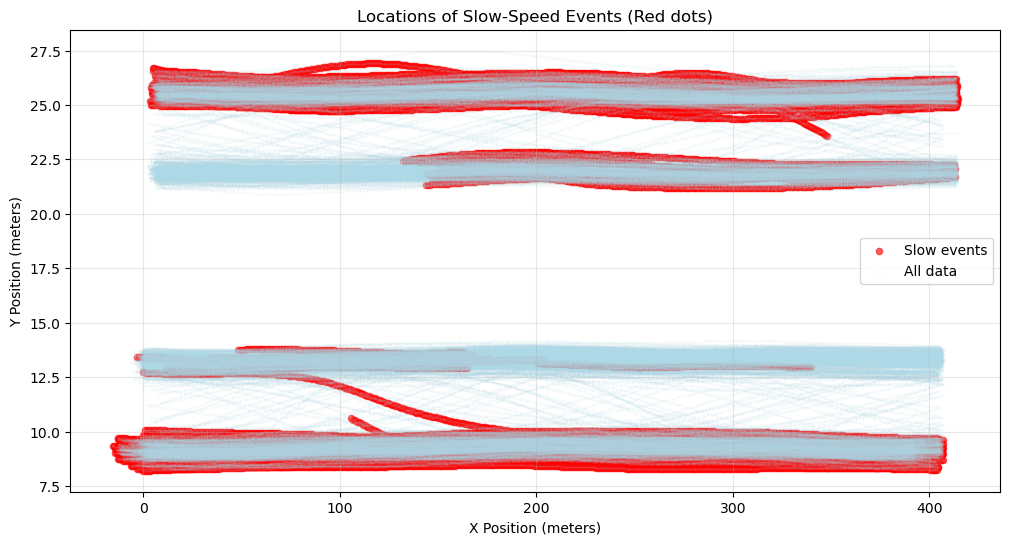

In [181]:
# Find slow-moving vehicles
SLOW_SPEED_THRESHOLD = 22.3  # m/s (about 7 km/h)
slow_events = tracks_df[tracks_df['speed'] < SLOW_SPEED_THRESHOLD]

display(tracks_df[["speed"]].describe())

display(slow_events.head())

if len(slow_events) > 0:
    print(f"Vehicles that had slow events: {slow_events['id'].nunique()}")
    print("\nSample slow events:")
    print(slow_events[['id', 'frame', 'x', 'y', 'speed', 'laneId']].head(10))
    
    # Plot slow events
    print("Creating Plot 4: Slow Event Locations...")
    plt.figure(figsize=(12, 6))
    plt.scatter(slow_events['x'], slow_events['y'], c='red', alpha=0.6, s=20, label='Slow events')
    plt.scatter(tracks_df['x'], tracks_df['y'], c='lightblue', alpha=0.1, s=1, label='All data')
    plt.xlabel('X Position (meters)')
    plt.ylabel('Y Position (meters)')
    plt.title('Locations of Slow-Speed Events (Red dots)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print("No significant slow events found - this is highway data!")


